In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.9.0
!pip install ampligraph

In [ ]:
import numpy as np
import pandas as pd
import ampligraph
import tensorflow as tf

Выгрузить датасет из внешнего ресурса и сохранить его в локальном файле (это можно сделать вручную, если прямой ссылки на датасет нет);

In [ ]:
df = pd.read_csv("output.csv")
df

,'Entity','hasConfiguaration','hasSupervisedLearning','hasNeuralLanguageProcessing','hasTransformer','hasUnsupervisedLearning','hasHardware','hasReinforcementLearning','hasOperatingSystem','hasComputerVision','hasRecurrentNeuralNetwork','hasAutoencoder','hasConvolutionalNeuralNetwork','hasFramework','includeLibraries','hasSpeechRecognition','include','hasDataset',Unnamed: 18
0,'Actor-Critic Methods',NaN,"'""Deep Neural Networks""'",NaN,NaN,NaN,NaN,"'""Actor-Critic Methods""'",NaN,NaN,NaN,NaN,NaN,"'""TensorFlow""'",NaN,NaN,NaN,NaN,NaN
1,'AlexNet_paper',NaN,"'""Deep Neural Networks""'",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"'""AlexNet""'","'""TensorFlow""'",NaN,NaN,NaN,NaN,NaN
2,'BERT_paper',NaN,"'""Gradient Boosting""'","'""Text Classification""'",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"'""TensorFlow""'",NaN,NaN,NaN,NaN,NaN
3,'BshapeNet',NaN,"'""Deep Neural Networks""'",NaN,NaN,NaN,"'""NVIDIA GTX 1080Ti""'",NaN,NaN,"'""Instance Segmentation\tObject detection""'",NaN,NaN,"'""R-CNN""'",NaN,NaN,NaN,NaN,"'""MS COCO (Common Objects in Context)""'",NaN
4,'Deep Q-Networks',NaN,"'""Deep Neural Networks""'",NaN,NaN,NaN,NaN,"'""Deep Q-Networks""'",NaN,NaN,NaN,NaN,NaN,"'""TensorFlow""'",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,'BERT_paper',NaN,"'""Deep Neural Networks""'","'""Language Understanding""'","'""BERT""'",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"'""TensorFlow""'",NaN,NaN,NaN,"'""Wikipedia""'"
165,'RoBERTa_paper',NaN,"'""Deep Neural Networks""'","'""Language Understanding""'","'""RoBERTa""'",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"'""PyTorch""'",NaN,NaN,NaN,"'""CC-News""'"
166,'ALBERT_paper',NaN,"'""Deep Neural Networks""'","'""Language Representation""'","'""ALBERT""'",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"'""TensorFlow""'",NaN,NaN,NaN,"'""BookCorpus and English Wikipedia""'"
167,'XLNet_paper',NaN,"'""Deep Neural Networks""'","'""Language Understanding""'","'""XLNet""'",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"'""TensorFlow""'",NaN,NaN,NaN,"'""Wikipedia Corpus""'"


In [ ]:
df.isna().sum()

,0
'Entity',0
'hasConfiguaration',169
'hasSupervisedLearning',0
'hasNeuralLanguageProcessing',53
'hasTransformer',59
'hasUnsupervisedLearning',161
'hasHardware',167
'hasReinforcementLearning',162
'hasOperatingSystem',157
'hasComputerVision',149


Dropping matches with unknown score:

In [ ]:
df.columns = df.columns.str.replace("'", "").str.replace('"', '')
df = df.applymap(lambda x: x.replace("'", "").replace('"', '') if isinstance(x, str) else x)
df


<ipython-input-5-fe7e52d1c3f6>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace("'", "").replace('"', '') if isinstance(x, str) else x)


,Entity,hasConfiguaration,hasSupervisedLearning,hasNeuralLanguageProcessing,hasTransformer,hasUnsupervisedLearning,hasHardware,hasReinforcementLearning,hasOperatingSystem,hasComputerVision,hasRecurrentNeuralNetwork,hasAutoencoder,hasConvolutionalNeuralNetwork,hasFramework,includeLibraries,hasSpeechRecognition,include,hasDataset,Unnamed: 18
0,Actor-Critic Methods,NaN,Deep Neural Networks,NaN,NaN,NaN,NaN,Actor-Critic Methods,NaN,NaN,NaN,NaN,NaN,TensorFlow,NaN,NaN,NaN,NaN,NaN
1,AlexNet_paper,NaN,Deep Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AlexNet,TensorFlow,NaN,NaN,NaN,NaN,NaN
2,BERT_paper,NaN,Gradient Boosting,Text Classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorFlow,NaN,NaN,NaN,NaN,NaN
3,BshapeNet,NaN,Deep Neural Networks,NaN,NaN,NaN,NVIDIA GTX 1080Ti,NaN,NaN,Instance Segmentation\tObject detection,NaN,NaN,R-CNN,NaN,NaN,NaN,NaN,MS COCO (Common Objects in Context),NaN
4,Deep Q-Networks,NaN,Deep Neural Networks,NaN,NaN,NaN,NaN,Deep Q-Networks,NaN,NaN,NaN,NaN,NaN,TensorFlow,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,BERT_paper,NaN,Deep Neural Networks,Language Understanding,BERT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorFlow,NaN,NaN,NaN,Wikipedia
165,RoBERTa_paper,NaN,Deep Neural Networks,Language Understanding,RoBERTa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PyTorch,NaN,NaN,NaN,CC-News
166,ALBERT_paper,NaN,Deep Neural Networks,Language Representation,ALBERT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorFlow,NaN,NaN,NaN,BookCorpus and English Wikipedia
167,XLNet_paper,NaN,Deep Neural Networks,Language Understanding,XLNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorFlow,NaN,NaN,NaN,Wikipedia Corpus


Обеспечить отсутствие null значений в датасете, простейший сценарий - удалить такие строки, если их немного;

In [ ]:
df = df.fillna("No")
df

,Entity,hasConfiguaration,hasSupervisedLearning,hasNeuralLanguageProcessing,hasTransformer,hasUnsupervisedLearning,hasHardware,hasReinforcementLearning,hasOperatingSystem,hasComputerVision,hasRecurrentNeuralNetwork,hasAutoencoder,hasConvolutionalNeuralNetwork,hasFramework,includeLibraries,hasSpeechRecognition,include,hasDataset,Unnamed: 18
0,Actor-Critic Methods,No,Deep Neural Networks,No,No,No,No,Actor-Critic Methods,No,No,No,No,No,TensorFlow,No,No,No,No,No
1,AlexNet_paper,No,Deep Neural Networks,No,No,No,No,No,No,No,No,No,AlexNet,TensorFlow,No,No,No,No,No
2,BERT_paper,No,Gradient Boosting,Text Classification,No,No,No,No,No,No,No,No,No,TensorFlow,No,No,No,No,No
3,BshapeNet,No,Deep Neural Networks,No,No,No,NVIDIA GTX 1080Ti,No,No,Instance Segmentation\tObject detection,No,No,R-CNN,No,No,No,No,MS COCO (Common Objects in Context),No
4,Deep Q-Networks,No,Deep Neural Networks,No,No,No,No,Deep Q-Networks,No,No,No,No,No,TensorFlow,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,BERT_paper,No,Deep Neural Networks,Language Understanding,BERT,No,No,No,No,No,No,No,No,No,TensorFlow,No,No,No,Wikipedia
165,RoBERTa_paper,No,Deep Neural Networks,Language Understanding,RoBERTa,No,No,No,No,No,No,No,No,No,PyTorch,No,No,No,CC-News
166,ALBERT_paper,No,Deep Neural Networks,Language Representation,ALBERT,No,No,No,No,No,No,No,No,No,TensorFlow,No,No,No,BookCorpus and English Wikipedia
167,XLNet_paper,No,Deep Neural Networks,Language Understanding,XLNet,No,No,No,No,No,No,No,No,No,TensorFlow,No,No,No,Wikipedia Corpus


In [ ]:
df["hasTransformer"].value_counts()

,count
hasTransformer,
No,59
XLNet,6
T5,6
RoBERTa,6
ALBERT,6
BERT,6
SimCLR,5
VQ-VAE,5
StyleGAN2,5


In [ ]:
df["hasConfiguaration"] = "Config" + df.hasConfiguaration.astype(str)
df["hasNeuralLanguageProcessing"] = "NLP" + df.hasNeuralLanguageProcessing.astype(str)
df["hasTransformer"] = "Transformer" + df.hasTransformer.astype(str)
df["hasUnsupervisedLearning"] = "Unsupervised" + df.hasUnsupervisedLearning.astype(str)
df["hasHardware"] = "Hardware" + df.hasHardware.astype(str)
df["hasReinforcementLearning"] = "Reinforcement" + df.hasReinforcementLearning.astype(str)
df["hasOperatingSystem"] = "OS" + df.hasOperatingSystem.astype(str)
df["hasComputerVision"] = "CV" + df.hasComputerVision.astype(str)
df["hasRecurrentNeuralNetwork"] = "RNN" + df.hasRecurrentNeuralNetwork.astype(str)
df["hasAutoencoder"] = "Autoencoder" + df.hasAutoencoder.astype(str)
df["hasConvolutionalNeuralNetwork"] = "CNN" + df.hasConvolutionalNeuralNetwork.astype(str)
df["hasFramework"] = "Framework" + df.hasFramework.astype(str)
df["includeLibraries"] = "Libraries" + df.includeLibraries.astype(str)
df["hasSpeechRecognition"] = "SpeechRecog" + df.hasSpeechRecognition.astype(str)
df["include"] = "Include" + df.include.astype(str)
df["hasDataset"] = "Dataset" + df.hasDataset.astype(str)

df = df.drop(columns=['Unnamed: 18'])

In [ ]:
df

,Entity,hasConfiguaration,hasSupervisedLearning,hasNeuralLanguageProcessing,hasTransformer,hasUnsupervisedLearning,hasHardware,hasReinforcementLearning,hasOperatingSystem,hasComputerVision,hasRecurrentNeuralNetwork,hasAutoencoder,hasConvolutionalNeuralNetwork,hasFramework,includeLibraries,hasSpeechRecognition,include,hasDataset
0,Actor-Critic Methods,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementActor-Critic Methods,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo
1,AlexNet_paper,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNAlexNet,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo
2,BERT_paper,ConfigNo,Gradient Boosting,NLPText Classification,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo
3,BshapeNet,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNVIDIA GTX 1080Ti,ReinforcementNo,OSNo,CVInstance Segmentation\tObject detection,RNNNo,AutoencoderNo,CNNR-CNN,FrameworkNo,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetMS COCO (Common Objects in Context)
4,Deep Q-Networks,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementDeep Q-Networks,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,BERT_paper,ConfigNo,Deep Neural Networks,NLPLanguage Understanding,TransformerBERT,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesTensorFlow,SpeechRecogNo,IncludeNo,DatasetNo
165,RoBERTa_paper,ConfigNo,Deep Neural Networks,NLPLanguage Understanding,TransformerRoBERTa,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesPyTorch,SpeechRecogNo,IncludeNo,DatasetNo
166,ALBERT_paper,ConfigNo,Deep Neural Networks,NLPLanguage Representation,TransformerALBERT,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesTensorFlow,SpeechRecogNo,IncludeNo,DatasetNo
167,XLNet_paper,ConfigNo,Deep Neural Networks,NLPLanguage Understanding,TransformerXLNet,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesTensorFlow,SpeechRecogNo,IncludeNo,DatasetNo


Определить критерий разбиения датасета на обучающую и тестировочную выборки (например, задать какое-либо пограничное значения поля с типом даты - все записи, имеющие дату, меньшую заданного значения, относятся к обучающей выборке, остальные - к тестировочной).

In [ ]:
df["train"] = (df['hasTransformer'] != "TransformerNo")
df


,Entity,hasConfiguaration,hasSupervisedLearning,hasNeuralLanguageProcessing,hasTransformer,hasUnsupervisedLearning,hasHardware,hasReinforcementLearning,hasOperatingSystem,hasComputerVision,hasRecurrentNeuralNetwork,hasAutoencoder,hasConvolutionalNeuralNetwork,hasFramework,includeLibraries,hasSpeechRecognition,include,hasDataset,train
0,Actor-Critic Methods,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementActor-Critic Methods,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo,False
1,AlexNet_paper,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNAlexNet,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo,False
2,BERT_paper,ConfigNo,Gradient Boosting,NLPText Classification,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo,False
3,BshapeNet,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNVIDIA GTX 1080Ti,ReinforcementNo,OSNo,CVInstance Segmentation\tObject detection,RNNNo,AutoencoderNo,CNNR-CNN,FrameworkNo,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetMS COCO (Common Objects in Context),False
4,Deep Q-Networks,ConfigNo,Deep Neural Networks,NLPNo,TransformerNo,UnsupervisedNo,HardwareNo,ReinforcementDeep Q-Networks,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkTensorFlow,LibrariesNo,SpeechRecogNo,IncludeNo,DatasetNo,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,BERT_paper,ConfigNo,Deep Neural Networks,NLPLanguage Understanding,TransformerBERT,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesTensorFlow,SpeechRecogNo,IncludeNo,DatasetNo,True
165,RoBERTa_paper,ConfigNo,Deep Neural Networks,NLPLanguage Understanding,TransformerRoBERTa,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesPyTorch,SpeechRecogNo,IncludeNo,DatasetNo,True
166,ALBERT_paper,ConfigNo,Deep Neural Networks,NLPLanguage Representation,TransformerALBERT,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesTensorFlow,SpeechRecogNo,IncludeNo,DatasetNo,True
167,XLNet_paper,ConfigNo,Deep Neural Networks,NLPLanguage Understanding,TransformerXLNet,UnsupervisedNo,HardwareNo,ReinforcementNo,OSNo,CVNo,RNNNo,AutoencoderNo,CNNNo,FrameworkNo,LibrariesTensorFlow,SpeechRecogNo,IncludeNo,DatasetNo,True


Сформировать названия узлов графа, информация о которых содержится в текущей строке;
Сформировать список триплетов, информация о которых содержится в текущей строке;

In [ ]:
triples = []
for idx, row in df[df["train"]].iterrows():
    entity_id = f"Entity{idx}"
    config = (entity_id, "hasConfiguaration", row["hasConfiguaration"])
    supervised = (entity_id, "hasSupervisedLearning", row["hasSupervisedLearning"])
    nlp = (entity_id, "hasNeuralLanguageProcessing", row["hasNeuralLanguageProcessing"])
    transformer = (entity_id, "hasTransformer", row["hasTransformer"])
    unsupervised = (entity_id, "hasUnsupervisedLearning", row["hasUnsupervisedLearning"])
    hardware = (entity_id, "hasHardware", row["hasHardware"])
    reinforcement = (entity_id, "hasReinforcementLearning", row["hasReinforcementLearning"])
    os = (entity_id, "hasOperatingSystem", row["hasOperatingSystem"])
    cv = (entity_id, "hasComputerVision", row["hasComputerVision"])
    rnn = (entity_id, "hasRecurrentNeuralNetwork", row["hasRecurrentNeuralNetwork"])
    autoencoder = (entity_id, "hasAutoencoder", row["hasAutoencoder"])
    cnn = (entity_id, "hasConvolutionalNeuralNetwork", row["hasConvolutionalNeuralNetwork"])
    framework = (entity_id, "hasFramework", row["hasFramework"])
    libraries = (entity_id, "includeLibraries", row["includeLibraries"])
    speech_recog = (entity_id, "hasSpeechRecognition", row["hasSpeechRecognition"])
    include = (entity_id, "include", row["include"])
    dataset = (entity_id, "hasDataset", row["hasDataset"])

    triples.extend((config, supervised, nlp, transformer, unsupervised, hardware, reinforcement, os, cv, rnn, autoencoder, cnn, framework, libraries, speech_recog, include, dataset))


Объединить список триплетов, сформированный на предыдущем шаге, с общим списком триплетов.

In [ ]:
triples.extend(triples)
triples

[('Entity22', 'hasConfiguaration', 'ConfigNo'),
 ('Entity22', 'hasSupervisedLearning', 'Gradient Boosting'),
 ('Entity22', 'hasNeuralLanguageProcessing', 'NLPText Classification'),
 ('Entity22', 'hasTransformer', 'TransformerBERT'),
 ('Entity22', 'hasUnsupervisedLearning', 'UnsupervisedNo'),
 ('Entity22', 'hasHardware', 'HardwareNo'),
 ('Entity22', 'hasReinforcementLearning', 'ReinforcementNo'),
 ('Entity22', 'hasOperatingSystem', 'OSNo'),
 ('Entity22', 'hasComputerVision', 'CVNo'),
 ('Entity22', 'hasRecurrentNeuralNetwork', 'RNNNo'),
 ('Entity22', 'hasAutoencoder', 'AutoencoderNo'),
 ('Entity22', 'hasConvolutionalNeuralNetwork', 'CNNNo'),
 ('Entity22', 'hasFramework', 'FrameworkNo'),
 ('Entity22', 'includeLibraries', 'LibrariesTensorFlow'),
 ('Entity22', 'hasSpeechRecognition', 'SpeechRecogNo'),
 ('Entity22', 'include', 'IncludeNo'),
 ('Entity22', 'hasDataset', 'DatasetNo'),
 ('Entity38', 'hasConfiguaration', 'ConfigNo'),
 ('Entity38', 'hasSupervisedLearning', 'Deep Neural Networks'),

In [ ]:
triples_df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])
triples_df

,subject,predicate,object
0,Entity22,hasConfiguaration,ConfigNo
1,Entity22,hasSupervisedLearning,Gradient Boosting
2,Entity22,hasNeuralLanguageProcessing,NLPText Classification
3,Entity22,hasTransformer,TransformerBERT
4,Entity22,hasUnsupervisedLearning,UnsupervisedNo
...,...,...,...
3735,Entity168,hasFramework,FrameworkNo
3736,Entity168,includeLibraries,LibrariesTensorFlow
3737,Entity168,hasSpeechRecognition,SpeechRecogNo
3738,Entity168,include,IncludeNo


Список триплетов, соответствующий обучающей выборке, разделить на две выборки (первая выборка будет использоваться для обучения модели векторных представлений графов знаний, вторая - для ее оценки) так, чтобы все узлы графа были бы представлены в обеих выборках;

In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen

# Convert the list of triples into a numpy array with the correct shape
triples_array = np.array(triples, dtype=object).reshape(-1, 3)

X_train, X_valid = train_test_split_no_unseen(triples_array, test_size=200)
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (3540, 3)
Test set size:  (200, 3)


Выполнить инициализацию модели векторных представлений графов знаний;

In [ ]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer

model = ScoringBasedEmbeddingModel(k=100,
                                   eta=20,
                                   scoring_type='ComplEx',
                                   seed=0)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

Выполнить обучение модели на первой из двух выборок, сформированных на шаге 4.1.

In [ ]:
model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=100,
          verbose=True
          )

Epoch 1/100
52/52 [==============================] - 8s 153ms/step - loss: 211.3021
Epoch 2/100
52/52 [==============================] - 1s 18ms/step - loss: 211.2814
Epoch 3/100
52/52 [==============================] - 1s 17ms/step - loss: 211.2624
Epoch 4/100
52/52 [==============================] - 1s 15ms/step - loss: 211.2431
Epoch 5/100
52/52 [==============================] - 1s 19ms/step - loss: 211.2224
Epoch 6/100
52/52 [==============================] - 1s 14ms/step - loss: 211.1999
Epoch 7/100
52/52 [==============================] - 1s 23ms/step - loss: 211.1763
Epoch 8/100
52/52 [==============================] - 1s 20ms/step - loss: 211.1515
Epoch 9/100
52/52 [==============================] - 1s 22ms/step - loss: 211.1257
Epoch 10/100
52/52 [==============================] - 1s 15ms/step - loss: 211.0972
Epoch 11/100
52/52 [==============================] - 1s 16ms/step - loss: 211.0661
Epoch 12/100
52/52 [==============================] - 1s 14ms/step - loss: 211.0329


Оценить обученную модель векторных представлений графов знаний
Сформировать промежуточный результат оценки обученной модели на второй из двух выборок, сформированных на шаге 4.1, в качестве базовой выборки при формировании негативных триплетов использовать список триплетов, соответствующих всей обучающей выборке;


In [ ]:
ranks = model.evaluate(X_valid,
                      use_filter={'train': X_train,
                                  'test': X_valid},
                      corrupt_side='s,o',
                      verbose=True)

21/21 [==============================] - 3s 150ms/step


На основе сформированных промежуточных данных выполнить подсчет метрик:
MR (Mean Rank) - среднее значение позиции корректного триплета в ранжированном списке по результатам работы модели (чем меньше - тем лучше, максимальное значение зависит от объема выборки и количества генерируемых негативных триплетов);
MRR (Mean Reciprocal Rank) - среднее значение величины, обратной номеру позиции корректного триплета в ранжированном списке по результатам работы модели (чем больше - тем лучше, максимальное значение - 1);
Hits@N - доля корректных триплетов, попавших в top-N ранжированного списка по результатам работы модели (чем больше, тем лучше, максимальное значение - 1).


In [ ]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: inf
MR: -2.29
Hits@10: 1.00
Hits@3: 1.00
Hits@1: 0.98


/usr/local/lib/python3.10/dist-packages/ampligraph/evaluation/metrics.py:152: RuntimeWarning: divide by zero encountered in divide
  return np.sum(1 / ranks) / len(ranks)


In [ ]:
!git clone https://github.com/wyldebeast-wunderliebe/incf.countryutils.git
!cd incf.countryutils && pip install .

Cloning into 'incf.countryutils'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 132 (delta 20), reused 39 (delta 16), pack-reused 87 (from 1)
Receiving objects: 100% (132/132), 66.24 KiB | 983.00 KiB/s, done.
Resolving deltas: 100% (58/58), done.
Processing /content/incf.countryutils
  Preparing metadata (setup.py) ... done
  Created wheel for incf.countryutils: filename=incf.countryutils-1.2-py3-none-any.whl size=21366 sha256=8f98be1381d3fceac6598020aff1ab71a7a2b0a6edb09503d1eff62a05a9a0e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-2eimlbf8/wheels/c9/1a/60/d7400cda03816dbfc1647ccbb66be83b3e42077058131932d1
Successfully built incf.countryutils


In [ ]:
!pip install adjustText

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from incf.countryutils import transformations
%matplotlib inline

In [ ]:
id_to_name_map = {**dict(zip(df.index, df.Entity)), **dict(zip(df.index, df.Entity))}
name_to_id_map = {v: k for k, v in id_to_name_map.items()}


In [ ]:
name_to_id_map

{'Actor-Critic Methods': 20,
 'AlexNet_paper': 21,
 'BERT_paper': 164,
 'BshapeNet': 23,
 'Deep Q-Networks': 24,
 'DenseNet_paper': 25,
 'EfficientNet_paper': 26,
 'Generative Adversarial Networks': 27,
 'GoogLeNet_paper': 28,
 'Long Short-Term Memory Networks paper': 29,
 'MobileNet_paper': 30,
 'Policy Gradient Methods': 31,
 'R-CNN_paper': 32,
 'ResNet_paper': 33,
 'Temporal Convolutional Networks paper': 34,
 'Transformer_paper': 35,
 'UNet_paper': 36,
 'Variational Autoencoders': 17,
 'VGGNet_paper': 18,
 'YOLO_paper': 57,
 'VGG_paper': 37,
 'GPT_paper': 38,
 'XLNet_paper': 167,
 'T5_paper': 168,
 'ELECTRA_paper': 41,
 'RoBERTa_paper': 165,
 'DistilBERT_paper': 43,
 'ALBERT_paper': 166,
 'Inception_paper': 45,
 'SqueezeNet_paper': 46,
 'Xception_paper': 47,
 'NASNet_paper': 48,
 'SENet_paper': 49,
 'ELMo_paper': 50,
 'FastText_paper': 51,
 'Word2Vec_paper': 52,
 'GloVe_paper': 53,
 'Doc2Vec_paper': 54,
 'InceptionResNet_paper': 55,
 'ShuffleNet_paper': 56,
 'SSD_paper': 58,
 'Mask

С использованием обученной модели векторных представлений графов знаний решить задачу кластеризации
Выбрать признак, по которому будет осуществляться кластеризация, а также структуру исходных данных. Структура исходных данных должна включать векторные представления сущностей или типов отношений, которые формируются обученной моделью векторных представлений графов знаний;
Установить вспомогательные зависимости;
Выполнить предобработку исходных данных для кластеризации (в процессе кластеризации требуется использовать весь датасет целиком) с целью обеспечения удобства визуализации результатов;
Осуществить визуализацию результатов кластеризации, которые ожидается получить. Отдельные кластеризуемые записи представляются в виде точек в двумерном пространстве, их принадлежность к тому или иному классу выражается в цвете точек;
Применить некоторую модель кластеризации для автоматического выделения кластеров (например, KMeans);
Визуализировать результаты кластеризации, полученные на предыдущем шаге, сравнить их с ожидаемыми результатами кластеризации;
Подсчитать adjusted rand score для формирования количественной оценки качества кластеризации.

The path trained_model.pkl already exists. This save operation will overwrite the model                 at the specified path.
WARNING - Found untraced functions such as _get_ranks while saving (showing 1 of 1). These functions will not be directly callable after loading.
Saved model does not include a db file. Skipping.

59 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_keys` to find out which keys are invalid.

19 [0.09762701 0.43037873]
58 [0.20552675 0.08976637]
17 [-0.1526904   0.29178823]
46 [-0.12482558  0.783546  ]
66 [ 0.92732552 -0.23311696]
80 [0.58345008 0.05778984]
86 [0.13608912 0.85119328]
8 [-0.85792788 -0.8257414 ]
10 [-0.95956321  0.66523969]
96 [0.5563135 0.7400243]
6 [0.95723668 0.59831713]
26 [-0.07704128  0.56105835]
2 [-0.76345115  0.27984204]
109 [-0.71329343  0.88933783]
22 [ 0.04369664 -0.17067612]
42 [-0.47088878  0.54846738]
25 [-0.08769934  0.1368679 ]
59 [-0.9624204   0.23527099

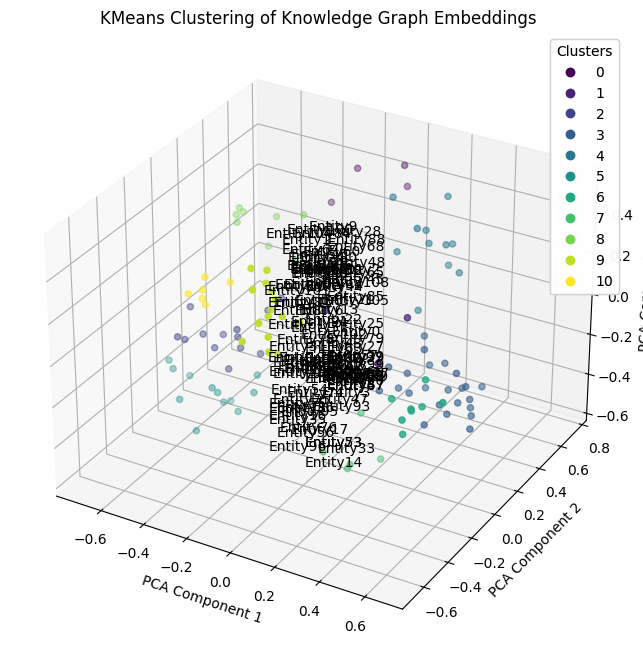

Adjusted Rand Score: -0.01
Best parameters: OrderedDict([('init', 'random'), ('max_iter', 496), ('n_clusters', 7), ('n_init', 30)])
19 [-0.88394168 -0.13116675]
58 [-0.37640824  0.39268698]
17 [-0.24449632 -0.64079264]
46 [-0.95064254 -0.86550074]
66 [ 0.35878555 -0.09260631]
80 [0.07315842 0.79334259]
86 [ 0.98067789 -0.56620603]
8 [ 0.32615641 -0.47335525]
10 [-0.958698    0.51675731]
96 [-0.3599657  -0.23307221]
6 [0.17663423 0.66209691]
26 [0.25796369 0.74530131]
2 [-0.45291593  0.59609367]
109 [-0.62872811  0.90558331]
22 [ 0.37497655 -0.56898465]
42 [0.89474118 0.46171161]
25 [-0.49211671 -0.57337605]
59 [ 0.03640143 -0.94867456]
20 [-0.58505985 -0.15062906]
29 [-0.25166004 -0.07284915]
45 [-0.44474259  0.17356869]
67 [ 0.72771121 -0.76493629]
88 [ 0.03475821 -0.73586379]
53 [ 0.43371936 -0.20788059]
103 [ 0.13084262 -0.63344033]
14 [-0.71030448 -0.02388744]
23 [-0.28877452  0.88086389]
50 [0.53065051 0.49732724]
52 [ 0.80743948 -0.83315513]
27 [0.10438494 0.16895214]
39 [ 0.9238

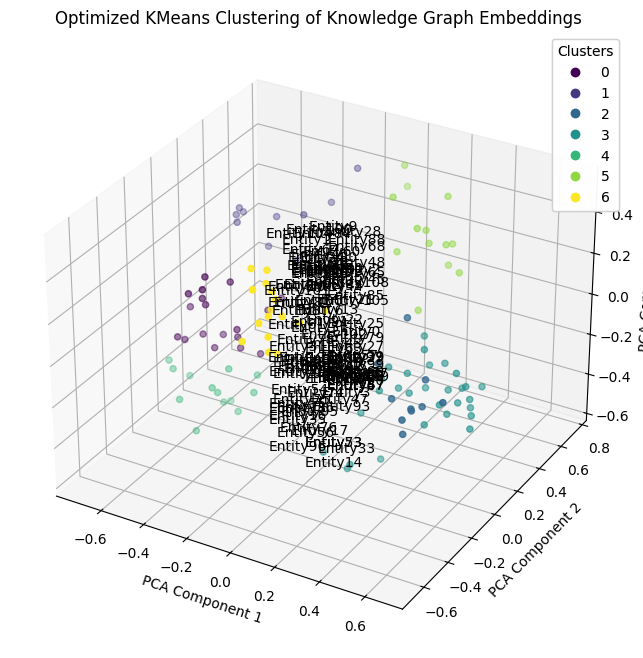

Adjusted Rand Score: -0.01


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, make_scorer
from sklearn.decomposition import PCA
from ampligraph.utils import save_model, restore_model
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from adjustText import adjust_text

# Сохранение и восстановление модели
save_model(model, 'trained_model.pkl')
model = restore_model('trained_model.pkl')

# Получение эмбеддингов
entities = [f"Entity{idx}" for idx in df.index]
entity_embeddings = model.get_embeddings(entities)

# PCA для уменьшения размерности
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(entity_embeddings)

# Простая кластеризация KMeans
kmeans = KMeans(n_clusters=11, random_state=0)
clusters = kmeans.fit_predict(reduced_embeddings)

# Визуализация кластеров
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2], c=clusters, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
texts = [ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], entities[i]) for i in range(len(reduced_embeddings))]
adjust_text(texts)
ax.set_title('KMeans Clustering of Knowledge Graph Embeddings')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

# Вычисление Adjusted Rand Index
true_labels = df['hasTransformer'].apply(lambda x: 1 if x != "TransformerNo" else 0).values
adjusted_rand = adjusted_rand_score(true_labels[:len(clusters)], clusters)
print(f'Adjusted Rand Score: {adjusted_rand:.2f}')

# Определение кастомного скоринга
def adjusted_rand_scorer(estimator, X, y_true):
    y_pred = estimator.fit_predict(X)
    return adjusted_rand_score(y_true, y_pred)

# Определение пространства поиска
search_space = {
    'n_clusters': (7, 10),  # Adjusted to be within the range of the number of samples
    'init': ['k-means++', 'random'],
    'n_init': (10, 30),
    'max_iter': (100, 500)
}

# Оптимизация параметров с использованием BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=KMeans(random_state=0),
    search_spaces=search_space,
    n_iter=32,
    scoring=make_scorer(adjusted_rand_score, greater_is_better=True),
    cv=3,
    n_jobs=-1,
    random_state=0
)

bayes_search.fit(reduced_embeddings, true_labels[:len(reduced_embeddings)])
best_params = bayes_search.best_params_
print(f'Best parameters: {best_params}')

# Применение оптимальных параметров
best_kmeans = bayes_search.best_estimator_
clusters = best_kmeans.fit_predict(reduced_embeddings)

# Визуализация оптимизированных кластеров
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2], c=clusters, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
texts = [ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], entities[i]) for i in range(len(reduced_embeddings))]
adjust_text(texts)
ax.set_title('Optimized KMeans Clustering of Knowledge Graph Embeddings')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

# Вычисление Adjusted Rand Index для оптимизированной модели
adjusted_rand = adjusted_rand_score(true_labels[:len(clusters)], clusters)
print(f'Adjusted Rand Score: {adjusted_rand:.2f}')
import plotly.express as px
import plotly.graph_objects as go

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    z=reduced_embeddings[:, 2],
    color=clusters,
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'z': 'PCA Component 3'},
    title='Optimized KMeans Clustering of Knowledge Graph Embeddings'
)

# Add text annotations for each point
for i in range(len(reduced_embeddings)):
    fig.add_trace(go.Scatter3d(
        x=[reduced_embeddings[i, 0]],
        y=[reduced_embeddings[i, 1]],
        z=[reduced_embeddings[i, 2]],
        mode='text',
        text=entities[i],
        textposition='top center'
    ))

fig.show()

С использованием обученной модели векторных представлений графов знаний решить задачу предсказания недостающих ссылок
Выбрать тип сущности, который будет предсказываться моделью;
В соответствии с критерием разбиения датасета на обучающую и тестировочную выборки, для каждого триплета из тестировочной выборки, в состав которого входит сущность с типом, выбранном на предыдущем шаге, выполнить следующие действия:
Заменить сущность из триплета на какую-либо другую сущность, тем самым сформировав совокупность негативных триплетов;
С использованием обученной модели векторных представлений графов знаний, для исходного триплета и для негативных триплетов сформировать вероятность принадлежности каждого триплета графу (т.е. соответствия каждого триплета обученной модели);
Выполнить ранжирование списка триплетов (по убыванию величины вероятности), который включает исходный триплет и все негативные триплеты, сформированные на предыдущем шаге;
Зафиксировать номер позиции исходного триплета в ранжированном списке;
Выполнить количественную оценку качества решения задачи предсказания недостающих ссылок с использованием одной из метрик, указанных в пункте 5.2.


In [ ]:
# Select the entity type to be predicted
entity_type = 'hasTransformer'

# Generate negative triples and evaluate the model
ranks = []
for triple in X_valid:
    if triple[1] == entity_type:
        # Generate negative triples by replacing the entity
        negative_triples = []
        for entity in entities:
            if entity != triple[0]:
                negative_triples.append((entity, triple[1], triple[2]))

        # Add the original triple to the list
        all_triples = [triple] + negative_triples

        # Compute the probabilities of each triple
        scores = model.predict(all_triples)

        # Rank the triples based on their scores
        ranked_triples = sorted(zip(all_triples, scores), key=lambda x: x[1], reverse=True)

        # Find the rank of the original triple
        original_rank = next(i for i, t in enumerate(ranked_triples) if np.array_equal(t[0], triple))
        ranks.append(original_rank + 1)

# Calculate evaluation metrics
mr = np.mean(ranks)
mrr = np.mean([1.0 / rank for rank in ranks])
hits_10 = np.mean([1 if rank <= 10 else 0 for rank in ranks])
hits_3 = np.mean([1 if rank <= 3 else 0 for rank in ranks])
hits_1 = np.mean([1 if rank == 1 else 0 for rank in ranks])

print("MR: %.2f" % (mr))
print("MRR: %.2f" % (mrr))
print("Hits@10: %.2f" % (hits_10))
print("Hits@3: %.2f" % (hits_3))
print("Hits@1: %.2f" % (hits_1))


59 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_keys` to find out which keys are invalid. 


59 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_keys` to find out which keys are invalid. 


59 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_keys` to find out which keys are invalid. 


59 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_keys` to find out which keys are invalid. 


59 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_keys` to find out which keys are invalid. 


59 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_